### Represent every minute data with a symbol triplet and assign probability to it.
1. We work with 180 records 
2. Take 110 records for training
3. Remaining 70 records for testing 
4. The symbolic representation is performed on raw data (0 and nan removed, interpolated and back filled)
5. Raw data is normalized before doing a SAX on it

In [1]:
import pandas as pd
import numpy as np


In [2]:
dfstat = pd.read_csv(r'parStat.csv',sep=',')
display(dfstat)
# Below is mean and standard deviation of parameters to be used normalization
mRR = dfstat['Mean'][dfstat['Parameter']=='RR'].values[0]
sdRR = dfstat['StdDev'][dfstat['Parameter']=='RR'].values[0]
mSpO2 = dfstat['Mean'][dfstat['Parameter']=='SpO2'].values[0]
sdSpO2 = dfstat['StdDev'][dfstat['Parameter']=='SpO2'].values[0]
mHR = dfstat['Mean'][dfstat['Parameter']=='HR'].values[0]
sdHR = dfstat['StdDev'][dfstat['Parameter']=='HR'].values[0]
#print(mRR)
#print(sdRR)
#print(mSpO2)
#print(sdSpO2)
#print(mHR)
#print(sdHR)

,Parameter,Mean,StdDev
0,RR,20.073284,6.376141
1,SpO2,96.074189,4.515870
2,HR,86.446392,18.010956


In [3]:
# Combining data of 110 records in normalized form along with label in a single dataframe
TrainData = pd.DataFrame(columns=['RR','SpO2','HR','Label'])
for i in range(110):
    fname = './SeriesSegData/p' + str(i).zfill(3) + '.csv'
    df = pd.read_csv(fname, sep = ',')
    #display(df)
    tdf = pd.DataFrame(columns=['RR','SpO2','HR','Label'])
    tdf['RR'] = (df['RRraw'].values - mRR)/sdRR
    tdf['SpO2'] = (df['SpO2raw'].values - mSpO2)/sdSpO2
    tdf['HR'] = (df['HRraw'].values - mHR)/sdHR
    tdf['Label'] = df['Label'].values
    TrainData = TrainData.append(tdf,ignore_index=False)
display(TrainData)

,RR,SpO2,HR,Label
0,-0.168328,-0.016428,1.102307,0
1,-0.732933,0.005716,0.963503,0
2,-0.544731,0.160725,0.996816,0
3,-0.874084,0.205013,0.941294,0
4,-0.670199,0.205013,0.946846,0
5,-0.654516,0.205013,0.902429,0
6,-0.560415,0.205013,0.874668,0
7,-0.795667,0.404310,0.852459,0
8,-0.701566,0.426454,0.813594,0
9,-0.356530,0.382166,0.830251,0


In [4]:
cutpoints    = [-np.inf,-1.5,-1,-0.5,0,0.5,1,1.5,np.inf]
TrainData['symRR'] = pd.cut(TrainData['RR'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
TrainData['symSpO2']   = pd.cut(TrainData['SpO2'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
TrainData['symHR'] = pd.cut(TrainData['HR'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
TrainData['symbol']=TrainData.apply(lambda row: row['symRR']+ row['symSpO2']+row['symHR'],axis=1)
display(TrainData)

,RR,SpO2,HR,Label,symRR,symSpO2,symHR,symbol
0,-0.168328,-0.016428,1.102307,0,D,D,G,DDG
1,-0.732933,0.005716,0.963503,0,C,E,F,CEF
2,-0.544731,0.160725,0.996816,0,C,E,F,CEF
3,-0.874084,0.205013,0.941294,0,C,E,F,CEF
4,-0.670199,0.205013,0.946846,0,C,E,F,CEF
5,-0.654516,0.205013,0.902429,0,C,E,F,CEF
6,-0.560415,0.205013,0.874668,0,C,E,F,CEF
7,-0.795667,0.404310,0.852459,0,C,E,F,CEF
8,-0.701566,0.426454,0.813594,0,C,E,F,CEF
9,-0.356530,0.382166,0.830251,0,D,E,F,DEF


In [5]:
# Points at which we are cutting the values
labels = ["A","B","C","D","E","F","G","H"]
cutpoints = [-np.inf, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, np.inf]
print('Symbol     '+ 'Normalized Range     ' + 'Actual RR range     ' + 'Actual SpO2 range     ' + 'Actual HR Range     ')
rrR = sdRR*np.array(cutpoints) + mRR
spo2R = sdSpO2*np.array(cutpoints) + mSpO2
hrR = sdHR*np.array(cutpoints) + mHR  

for i in range(8):
    lab = labels[i]
    print(str(lab) + "          " +  str(cutpoints[i]) + " to " + str(cutpoints[i+1]) + "         " + "{0:.2f}".format(rrR[i]) + " to " + "{0:.2f}".format(rrR[i+1]) + "        " + "{0:.2f}".format(spo2R[i]) + " to " + "{0:.2f}".format(spo2R[i+1]) + "           "  + "{0:.2f}".format(hrR[i]) + " to " + "{0:.2f}".format(hrR[i+1]))


Symbol     Normalized Range     Actual RR range     Actual SpO2 range     Actual HR Range     
A          -inf to -1.5         -inf to 10.51        -inf to 89.30           -inf to 59.43
B          -1.5 to -1         10.51 to 13.70        89.30 to 91.56           59.43 to 68.44
C          -1 to -0.5         13.70 to 16.89        91.56 to 93.82           68.44 to 77.44
D          -0.5 to 0         16.89 to 20.07        93.82 to 96.07           77.44 to 86.45
E          0 to 0.5         20.07 to 23.26        96.07 to 98.33           86.45 to 95.45
F          0.5 to 1         23.26 to 26.45        98.33 to 100.59           95.45 to 104.46
G          1 to 1.5         26.45 to 29.64        100.59 to 102.85           104.46 to 113.46
H          1.5 to inf         29.64 to inf        102.85 to inf           113.46 to inf


In [6]:
# Making positive and negative datasets
# Calculate frequency of each symbol in each of the dataset
TrainDataPositive = TrainData[TrainData.Label ==1]
TrainDataPositive = TrainDataPositive[['symbol','Label']]
TrainDataPositive = TrainDataPositive.groupby('symbol').count()
TrainDataPositive = TrainDataPositive.rename(columns = {"Label": "PositiveFreq"}) 

TrainDataNegative = TrainData[TrainData.Label ==0]
TrainDataNegative = TrainDataNegative[['symbol','Label']]
TrainDataNegative = TrainDataNegative.groupby('symbol').count()
TrainDataNegative = TrainDataNegative.rename(columns = {"Label": "NegativeFreq"}) 

#default outer join (will give us frequency of symbol in positive and negative)
TrainDataFreq = pd.concat([TrainDataPositive, TrainDataNegative], axis=1)
TrainDataFreq = TrainDataFreq.fillna(0)
display(TrainDataFreq)

# Now calculate probability of symbol belonging in positive dataset

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,PositiveFreq,NegativeFreq
AAA,19.0,66.0
AAB,6.0,108.0
AAC,7.0,72.0
AAD,29.0,38.0
AAE,13.0,12.0
AAF,6.0,42.0
AAG,5.0,12.0
AAH,114.0,67.0
ABA,7.0,5.0
ABB,4.0,18.0


###### Before going further we check whether all symbols that come up in Testing Set are present in Training Set
###### If not then, how many such symbols are there that are in Testing Set and not in Training Set
###### How to accommodate them

In [7]:
TestData = pd.DataFrame(columns=['RR','SpO2','HR','Label'])
for i in range(110,180,1):
    fname = './SeriesSegData/p' + str(i).zfill(3) + '.csv'
    df = pd.read_csv(fname, sep = ',')
    #display(df)
    tdf = pd.DataFrame(columns=['RR','SpO2','HR','Label'])
    tdf['RR'] = (df['RRraw'].values - mRR)/sdRR
    tdf['SpO2'] = (df['SpO2raw'].values - mSpO2)/sdSpO2
    tdf['HR'] = (df['HRraw'].values - mHR)/sdHR
    tdf['Label'] = df['Label'].values
    TestData = TestData.append(tdf,ignore_index=False)
#display(TestData)
cutpoints    = [-np.inf,-1.5,-1,-0.5,0,0.5,1,1.5,np.inf]
TestData['symRR'] = pd.cut(TestData['RR'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
TestData['symSpO2']   = pd.cut(TestData['SpO2'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
TestData['symHR'] = pd.cut(TestData['HR'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
TestData['symbol']=TestData.apply(lambda row: row['symRR']+ row['symSpO2']+row['symHR'],axis=1)
#display(TestData)
# Making positive and negative datasets
# Calculate frequency of each symbol in each of the dataset
TestDataPositive = TestData[TestData.Label ==1]
TestDataPositive = TestDataPositive[['symbol','Label']]
TestDataPositive = TestDataPositive.groupby('symbol').count()
TestDataPositive = TestDataPositive.rename(columns = {"Label": "PositiveFreq"}) 

TestDataNegative = TestData[TestData.Label ==0]
TestDataNegative = TestDataNegative[['symbol','Label']]
TestDataNegative = TestDataNegative.groupby('symbol').count()
TestDataNegative = TestDataNegative.rename(columns = {"Label": "NegativeFreq"}) 

#default outer join (will give us frequency of symbol in positive and negative)
TestDataFreq = pd.concat([TestDataPositive, TestDataNegative], axis=1)
TestDataFreq = TestDataFreq.fillna(0)
display(TestDataFreq)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,PositiveFreq,NegativeFreq
AAA,0.0,16.0
AAB,0.0,7.0
AAC,0.0,16.0
AAD,3.0,5.0
AAE,2.0,10.0
AAF,7.0,8.0
AAG,6.0,6.0
AAH,2.0,5.0
ABA,0.0,1.0
ABB,0.0,4.0


###### There are 384 unique symbols in Training Set, whereas there are 381 unique symbols in Test Set
###### Let's find intersection of these two, see which symbols are missing in Training set

In [8]:
setA = set(TrainDataFreq.index.values)
print(len(setA))
setB = set(TestDataFreq.index.values)
print(len(setB))
setC = setB.difference(setA)
print(setC)
setD = setA.intersection(setB)
print(len(setD))

384
381
set()
381


###### Fortunately our choice of Training and Test set seems apt, as there are no symbols in test set that are not present in train set

In [9]:
TrainDataFreq['PosProb'] = (TrainDataFreq['PositiveFreq'].values)/(TrainDataFreq['PositiveFreq'].values + TrainDataFreq['NegativeFreq'].values)
display(TrainDataFreq)
TrainDataFreq.to_csv('SAXProb.csv')

,PositiveFreq,NegativeFreq,PosProb
AAA,19.0,66.0,0.223529
AAB,6.0,108.0,0.052632
AAC,7.0,72.0,0.088608
AAD,29.0,38.0,0.432836
AAE,13.0,12.0,0.520000
AAF,6.0,42.0,0.125000
AAG,5.0,12.0,0.294118
AAH,114.0,67.0,0.629834
ABA,7.0,5.0,0.583333
ABB,4.0,18.0,0.181818


In [12]:
mydf = pd.read_csv('SAXProb.csv')
display(mydf)
mydf.rename( columns={'Unnamed: 0':'Symbol'}, inplace=True )
display(mydf)

,Unnamed: 0,PositiveFreq,NegativeFreq,PosProb
0,AAA,19.0,66.0,0.223529
1,AAB,6.0,108.0,0.052632
2,AAC,7.0,72.0,0.088608
3,AAD,29.0,38.0,0.432836
4,AAE,13.0,12.0,0.520000
5,AAF,6.0,42.0,0.125000
6,AAG,5.0,12.0,0.294118
7,AAH,114.0,67.0,0.629834
8,ABA,7.0,5.0,0.583333
9,ABB,4.0,18.0,0.181818


,Symbol,PositiveFreq,NegativeFreq,PosProb
0,AAA,19.0,66.0,0.223529
1,AAB,6.0,108.0,0.052632
2,AAC,7.0,72.0,0.088608
3,AAD,29.0,38.0,0.432836
4,AAE,13.0,12.0,0.520000
5,AAF,6.0,42.0,0.125000
6,AAG,5.0,12.0,0.294118
7,AAH,114.0,67.0,0.629834
8,ABA,7.0,5.0,0.583333
9,ABB,4.0,18.0,0.181818


In [13]:
mydf.to_csv('SAXProb.csv',index=False)

In [17]:
# This function will return probabilities corresponding to RR, SpO2, HR series
# Input will be dataframe of reference probabilities, dataframe of series, dataframe of parameters
def getProb(refProbDf, dfstat, data):
    #display(refProbDf)
    mRR = dfstat['Mean'][dfstat['Parameter']=='RR'].values[0]
    sdRR = dfstat['StdDev'][dfstat['Parameter']=='RR'].values[0]
    mSpO2 = dfstat['Mean'][dfstat['Parameter']=='SpO2'].values[0]
    sdSpO2 = dfstat['StdDev'][dfstat['Parameter']=='SpO2'].values[0]
    mHR = dfstat['Mean'][dfstat['Parameter']=='HR'].values[0]
    sdHR = dfstat['StdDev'][dfstat['Parameter']=='HR'].values[0]
    tdf = pd.DataFrame(columns=['RR','SpO2','HR','nRR','nSpO2','nHR','symRR','symSpO2','symHR','Symbol','Label'])
    tdf['RR'] = data['RRraw'].values
    tdf['SpO2'] = data['SpO2raw'].values
    tdf['HR'] = data['HRraw'].values
    tdf['nRR'] = (data['RRraw'].values - mRR)/sdRR
    tdf['nSpO2'] = (data['SpO2raw'].values - mSpO2)/sdSpO2
    tdf['nHR'] = (data['HRraw'].values - mHR)/sdHR
    tdf['Label'] = data['Label'].values
    #display(tdf)
    cutpoints = [-np.inf,-1.5,-1,-0.5,0,0.5,1,1.5,np.inf]
    tdf['symRR'] = pd.cut(tdf['nRR'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
    tdf['symSpO2'] = pd.cut(tdf['nSpO2'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
    tdf['symHR'] = pd.cut(tdf['nHR'], bins = cutpoints, labels=["A","B","C","D","E","F","G","H"])
    tdf['Symbol'] = tdf.apply(lambda row: row['symRR']+ row['symSpO2']+row['symHR'],axis=1)
    #display(tdf)
    newtdf = pd.merge(tdf , refProbDf[['Symbol', 'PosProb']], how = 'left', left_on='Symbol', right_on='Symbol')
    #display(newtdf)
    #display(newtdf)
    return newtdf

In [18]:
def movingAvg(x,n):
    y = np.zeros(len(x),dtype=np.float32)
    ysum = 0
    for i in range(len(x)):
        if(i<n):
            ysum += x[i]
            y[i] = ysum/float(i+1)
        else:
            ysum = ysum + x[i] - x[i-n]
            y[i] = ysum/float(n)
    return y

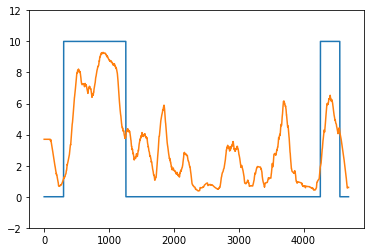

In [19]:
i = 144
refProbDf = pd.read_csv('SAXProb.csv')
dfstat = pd.read_csv(r'parStat.csv',sep=',')
fname = './SeriesSegData/p' + str(i).zfill(3) + '.csv'
data = pd.read_csv(fname,sep=',')
newtdf = getProb(refProbDf, dfstat, data)
#display(newtdf)
import matplotlib.pyplot as plt
#X_TEST = np.zeros((1,TOTAL_LEN,3), dtype=np.float32)
#X_TEST[0,:,0] = rrnaf
#X_TEST[0,:,1] = spo2naf
#X_TEST[0,:,2] = hrnaf
#predictions = model.predict(X_TEST)
#print(np.shape(predictions))

plt.axes(ylim=(-2,12))
plt.plot(10*newtdf['Label'].values)
plt.plot(10*movingAvg(newtdf['PosProb'].values,120))

plt.show()